In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits

# Make sure that you have to check this computer works as CUDA or CPU.
# But this project based on HYPER-V Linux,
# So it always executes as cpu.
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("Use the following devices. : ", DEVICE)

Use the following devices. :  cpu


In [3]:
net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [4]:
"""
    'nn.Sequential' is used to build a Neural Network by building
    'nn.Module Layer' one by one after another.
"""
digits = load_digits()

X = digits.data
Y = digits.target

In [5]:
# Convert 'ndarray' of 'Numpy' as a Pytorch Tensor.
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

# Softmax Cross-Entropy
loss_fn = nn.CrossEntropyLoss()

# Adam
optimizer = optim.Adam(net.parameters())

# The Log of Loss-Function
losses = []

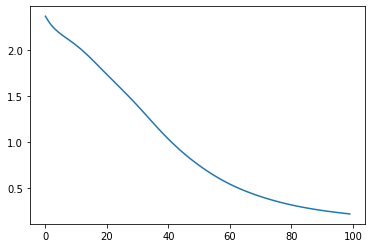

In [6]:
# Iterates 100-Times.
for epoch in range(100):
    # Delete previous value by calculated 'backward Method'.
    optimizer.zero_grad()
    
    # Calculate variable 'y' prediction value 
    # by using Linear_Model.
    y_pred = net(X)
    
    # Calculate differentiations by apply 'MSE-Loss'.
    loss = loss_fn(y_pred, Y)
    loss.backward()
    
    # Update Regression
    optimizer.step()
    
    # Record variable 'loss' for convergence confirmation.
    losses.append(loss.item())
    
# Unique Line..
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [7]:
X = X.to(DEVICE)
Y = Y.to(DEVICE)
net.to(DEVICE)
# For subsequent processing, 
# set the optimizer equally and rotate the learning loop.
# X = X.to("cuda:0")
# Y = Y.to("cuda:0")
# net.to("cuda:0")

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)